# **K-Means implementations:**

**Universidad Politecnica de Yucatan**

****High Performance Computing, Data 7B****

Team members:
*   Cynthia Vidal Ovando
*   Fatima Miranda Pestaña
*   Eduardo Mendoa Vargas

The objective of this project is to implement and compare different versions of the K Means clustering algorithm. You will be implementing three versions of the algorithm: Pure Python, Numpy Arrays, and Cython. Additionally, you will use profiling techniques to analyze the performance of  each  implementation  and  compare  them  as  a  function  of  the  size  of  the problem.

## **Implementations in codes**

Here we will write all the libraries that we are going to use

In [7]:
# Pure Python libraries
import random
import math
# We also use "import matplotlib.pyplot as plt" to show results
# Numpy exercise
import matplotlib.pyplot as plt
import numpy as np
import numexpr as ne
# We use timeit to check performance
import timeit

### **Using pure Python**
 Implement the basic K Means algorithm using only Python standard library functions.

In [33]:
import random
import math
import timeit

def euclidean_distance(p1, p2):
    # Calculate the Euclidean distance between two points.
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(p1, p2)]))

def initialize_centroids(data, k):
    """Initialize centroids by randomly selecting k data points."""
    centroids_idx = random.sample(range(len(data)), k)
    centroids = [data[idx] for idx in centroids_idx]  # Corrected line
    return centroids

def kmeans(data, k, max_iterations=100):
    """K Means clustering algorithm."""
    # Initialize centroids
    centroids = initialize_centroids(data, k)

    # Initialize clusters
    clusters = [[] for _ in range(k)]

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        for point in data:
            closest_centroid_index = min(
                range(k),
                key=lambda i: euclidean_distance(point, centroids[i])
            )
            clusters[closest_centroid_index].append(point)

        # Update centroids
        new_centroids = [
            [sum(dim) / len(cluster) for dim in zip(*cluster)]
            if cluster else random.choice(data)
            for cluster in clusters
        ]

        # Check for convergence
        if new_centroids == centroids:
            break

        centroids = new_centroids

        # Clear clusters
        clusters = [[] for _ in range(k)]

    return centroids, clusters

# Example usage:
if __name__ == "__main__":
    # Sample data generation (2D points)
    data = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(100)]

    # Number of clusters
    k = 3

    # Wrap the profiling and function call within the main guard
    execution_time = timeit.timeit(lambda: kmeans(data, k), number=1)
    # Print the execution time
    print("\nExecution time:", execution_time, "sec")

    # Since profiling and execution are now inside the main guard,
    # this ensures that `kmeans` is defined before it's called.
    centroids, clusters = kmeans(data, k)

    # Print centroids and clusters
    print("Centroids:")
    for centroid in centroids:
        print(centroid)
    print("\nClusters:")
    for cluster in clusters:
        print(cluster)



Execution time: 0.00561079999897629 sec
Centroids:
[19.1856513611977, 70.87525763745579]
[51.41581114845752, 23.19945155277694]
[77.24036819114066, 72.06868413654976]

Clusters:
[(2.773026616095331, 60.11521559196659), (26.81086199673157, 84.79224354502739), (20.446433275180244, 43.27893890465068), (29.225578958142208, 96.70904081233816), (19.022171754494988, 95.65050421095681), (35.09882291698886, 88.45607456446905), (36.7715277229504, 71.77484082315307), (1.8981987234312658, 39.876560711310674), (26.279390897924415, 90.93060430287849), (5.030907878749358, 69.66584382608264), (21.606699783263718, 96.53922270569545), (42.94132293246597, 72.91373051017854), (45.65381975985866, 68.11619022794055), (6.832078386933215, 38.551346303155945), (6.471065327733882, 41.802538972147715), (29.857377930717412, 91.78967866998448), (28.118541766167727, 73.44238483551933), (0.11579900124257803, 73.11824527498952), (1.6584058597600926, 42.275885549991), (30.61660716657012, 74.24509273072766), (13.73050

Let's better visualize this using matplotlib

In [5]:
def plot_clusters(centroids, clusters):
    """Plot the clusters and centroids."""
    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    for i, cluster in enumerate(clusters):
        color = colors[i % len(colors)]
        for point in cluster:
            plt.scatter(point[0], point[1], c=color, marker='.')

    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], c='k', marker='x', s=100)

    plt.title('K Means Clustering')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

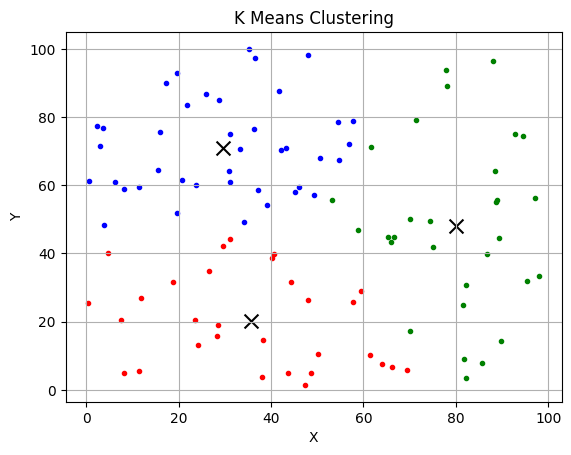

In [6]:
plot_clusters(centroids, clusters)

### **Using Numpy Arrays**
Optimize the algorithm using Numpy arrays for faster computationand Numexpr

In [27]:
def euclidean_distance(p1, p2):
    #Calculate the Euclidean distance between two points
    return math.sqrt(np.sum((p1 - p2) ** 2))

def initialize_centroids(data, k):
    #Initialize centroids by randomly selecting k data points
    centroids_idx = random.sample(range(len(data)), k)
    centroids = data[centroids_idx]
    return centroids

def kmeans2(data, k, max_iterations=100):
    """K Means clustering algorithm."""
    # Initialize centroids
    centroids = initialize_centroids(data, k)

    # Initialize clusters
    clusters = [[] for _ in range(k)]

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        distances = np.array([[euclidean_distance(point, centroid) for centroid in centroids] for point in data])
        nearest_centroid_indices = np.argmin(distances, axis=1)
        for i, idx in enumerate(nearest_centroid_indices):
            clusters[idx].append(data[i])

        # Update centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else data[random.randint(0, len(data) - 1)] for cluster in clusters])

        # Check for convergence
        if np.array_equal(new_centroids, centroids):
            break

        centroids = new_centroids

        # Clear clusters
        clusters = [[] for _ in range(k)]

    return centroids, clusters

def plot_clusters(centroids, clusters):
    #Plot the clusters and centroids
    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    for i, cluster in enumerate(clusters):
        color = colors[i % len(colors)]
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=color, marker='.')

    plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', s=100)

    plt.title('K Means Clustering')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Sample data generation (2D points)
    data = np.random.rand(100, 2) * 100

    # Number of clusters
    k = 3

    # Run K Means clustering
    centroids, clusters = kmeans2(data, k)

     # Print centroids and clusters
    print("Centroids:")
    for centroid in centroids:
        print(centroid)
    print("\nClusters:")
    for cluster in clusters:
        print(cluster)

    # Run K Means clustering and measure the time
    execution_time = timeit.timeit(lambda: kmeans2(data, k), number=1)

    # Print the execution time
    print("\nExecution time:", execution_time, "seconds")

Centroids:
[81.90278946 50.98738452]
[32.70500154 75.26485284]
[24.00232274 20.35808015]

Clusters:
[array([76.47862862,  8.65686489]), array([84.8916715 , 21.07385697]), array([83.09712966, 80.7001893 ]), array([99.05257446,  4.95909318]), array([77.90580549, 51.89797687]), array([71.92501983, 10.78648786]), array([91.58986672, 93.15944797]), array([95.23779816,  6.0046888 ]), array([65.3145982, 58.062828 ]), array([81.84104664, 19.29246951]), array([86.4330449, 15.6197139]), array([77.15924264, 92.01111335]), array([93.60938674, 95.23434318]), array([88.8020711 , 47.65989726]), array([64.06145164, 62.93490087]), array([90.59840097, 72.40739367]), array([50.58116533, 48.08640945]), array([73.72223389, 83.68367517]), array([82.25537243, 70.09657766]), array([65.64947391, 69.65820808]), array([94.91438409, 17.8702062 ]), array([90.16457635, 67.23655345]), array([69.81931644, 64.5119628 ]), array([85.98432196,  8.00869955]), array([84.94341331, 87.09071646]), array([97.86828864, 30.38568

Let's better visualize how the code is using matplotlib

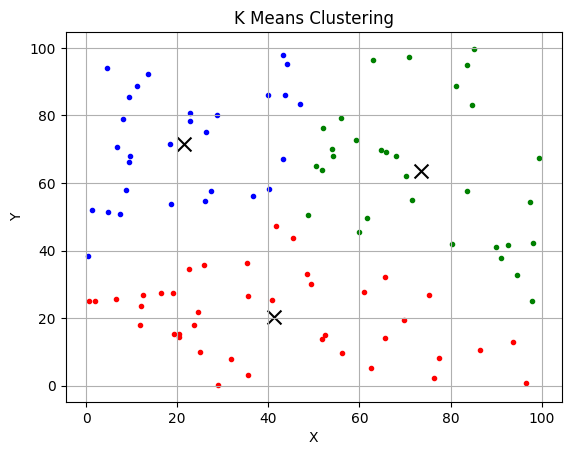

In [9]:
    # Plot clusters
    plot_clusters(centroids, clusters)

### **Cython**

The kmeans_cythonc.pyx

In [52]:
""" 
# cython: language_level=3
import numpy as np
cimport numpy as np
from libc.math cimport sqrt

# Euclidean distance calculation optimized with Cython
cdef double euclidean_distance(double[:] p1, double[:] p2) nogil:
    cdef double dist = 0
    cdef double diff
    cdef int i
    for i in range(p1.shape[0]):
        diff = p1[i] - p2[i]
        dist += diff * diff
    return sqrt(dist)

# Main K-Means clustering algorithm function
cpdef kmeans_cython(np.ndarray[np.double_t, ndim=2] data, int k, int max_iterations=100):
    cdef int num_points = data.shape[0]
    cdef int num_dims = data.shape[1]
    cdef np.ndarray[np.double_t, ndim=2] centroids = np.zeros((k, num_dims), dtype=np.double)
    cdef np.ndarray[np.int_t, ndim=1] nearest_centroid_indices = np.zeros(num_points, dtype=int)
    cdef np.ndarray[np.double_t, ndim=1] distances = np.zeros(k, dtype=np.double)
    cdef np.ndarray[np.double_t, ndim=2] new_centroids
    cdef list clusters = [np.empty((0, num_dims), dtype=np.double) for _ in range(k)]
    
    # Initialize centroids randomly
    for i in range(k):
        centroids[i] = data[np.random.randint(0, num_points)]

    # K-Means iteration
    for _ in range(max_iterations):
        for i in range(k):
            clusters[i] = np.empty((0, num_dims), dtype=np.double)

        # Assign points to the nearest centroid
        for i in range(num_points):
            for j in range(k):
                distances[j] = euclidean_distance(data[i], centroids[j])
            nearest_centroid_indices[i] = np.argmin(distances)
            clusters[nearest_centroid_indices[i]] = np.vstack((clusters[nearest_centroid_indices[i]], data[i]))

        # Update centroids
        for i in range(k):
            if len(clusters[i]) > 0:
                centroids[i] = np.mean(clusters[i], axis=0)
                
    return centroids, clusters

"""

' \n# cython: language_level=3\nimport numpy as np\ncimport numpy as np\nfrom libc.math cimport sqrt\n\n# Euclidean distance calculation optimized with Cython\ncdef double euclidean_distance(double[:] p1, double[:] p2) nogil:\n    cdef double dist = 0\n    cdef double diff\n    cdef int i\n    for i in range(p1.shape[0]):\n        diff = p1[i] - p2[i]\n        dist += diff * diff\n    return sqrt(dist)\n\n# Main K-Means clustering algorithm function\ncpdef kmeans_cython(np.ndarray[np.double_t, ndim=2] data, int k, int max_iterations=100):\n    cdef int num_points = data.shape[0]\n    cdef int num_dims = data.shape[1]\n    cdef np.ndarray[np.double_t, ndim=2] centroids = np.zeros((k, num_dims), dtype=np.double)\n    cdef np.ndarray[np.int_t, ndim=1] nearest_centroid_indices = np.zeros(num_points, dtype=int)\n    cdef np.ndarray[np.double_t, ndim=1] distances = np.zeros(k, dtype=np.double)\n    cdef np.ndarray[np.double_t, ndim=2] new_centroids\n    cdef list clusters = [np.empty((0, num

The setup scrip (setupcython.py)

In [53]:
""" 
from distutils.core import setup
from Cython.Build import cythonize
import numpy as np

setup(
    ext_modules=cythonize("kmeans_cythonc.pyx", compiler_directives={'language_level' : "3"}),
    include_dirs=[np.get_include()]  # This line is added to include NumPy headers
)
"""

' \nfrom distutils.core import setup\nfrom Cython.Build import cythonize\nimport numpy as np\n\nsetup(\n    ext_modules=cythonize("kmeans_cythonc.pyx", compiler_directives={\'language_level\' : "3"}),\n    include_dirs=[np.get_include()]  # This line is added to include NumPy headers\n)\n'

The .c file, and .pyd compiled modules:

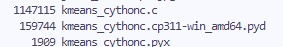

In [55]:
from IPython.display import Image
modulos = 'C:/Users/Cynthia/Documents/HPC/imagenes/cythoncompiled.jpg'
Image(filename=modulos)

## **Experimental Setup**
Define the parameters for the experiments:
* Number of clusters (K).
* Dimensionality of data points.
* Size of the dataset.

Set up the hardware and software environment for conducting the experiments.

### **Number of clusters (K)**
Let's start with this section. First of all, what do we mean with "K"? In the context of the K Means algorithm, "K" represents the number of clusters we wish to identify in our data. It is a parameter that is defined before applying the algorithm and determines how many centroids should be found.

It determines the clustering structure of the data. Each cluster is defined by its centroid, and the goal of the K Means algorithm is to assign each data point to the nearest centroid. Meaning that, K controls the level of clustering granularity: a higher value of K will result in a finer partitioning of the data into smaller clusters, while a lower value of K will result in larger and fewer clusters.

In this project we assigned a number of 3 in K as seen in the following section

```Python
    # Number of clusters
    k = 3
```

In the code we provided previously, the number of clusters is defined by the $k$ variable. To modify this value, we simply change the value of $k$ in the line corresponding to the assignment of the number of clusters. For example, if we want to change the number of clusters to 5, we simply modify the line $k = 3$ to $k = 5$

This modification will instruct the K Means algorithm to identify 5 clusters instead of 3 when running.

### **Dimensionality of data point**

Dimensionality refers to the number of features or attributes that are used to describe each data point in a data set. For example, if we are working with two-dimensional data, such as (x, y) coordinates, then the dimensionality of the data points is 2. If we are working with three-dimensional data, such as (x, y, z) coordinates, then the dimensionality would be 3. In general, dimensionality refers to the number of independent variables in the data set.

We can find this in the following section of the code:


```Python
if __name__ == "__main__":
    # Sample data generation (2D points)
    data = np.random.rand(100, 2) * 100
    ...
```
As dimensionality increases, the feature space becomes more sparse and the notion of distance between data points can become less meaningful, that's why in this context, we chose to use 2 dimensions.


### **Size of the dataset**

We generate datasets with varying dimensions and sizes for testing our K Means implementations using Numpy due to its efficiency in handling large arrays and matrices.

In [2]:
import numpy as np
import os

def generate_datasets(dimensions, sizes, output_dir="datasets"):
    """
    Generates datasets with varying dimensions and sizes.
    :param dimensions: List of dimensions for the data points.
    :param sizes: List of sizes (number of data points) for the datasets.
    :param output_dir: Directory to save the generated datasets.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for dim in dimensions:
        for size in sizes:
            #dataset with 'size' data points, each having 'dim' dimensions
            #we use a normal distribution centered at 0 with a standard deviation of 1
            dataset = np.random.normal(0, 1, (size, dim))
            
            #ataset to a file
            filename = f"dataset_{dim}d_{size}size.npy"
            filepath = os.path.join(output_dir, filename)
            np.save(filepath, dataset)
            print(f"Generated dataset with dimensions: {dim}, size: {size}, saved to {filename}")

In [3]:
#dimensions and sizes
dimensions = [2, 3, 5]
sizes = [1000, 5000, 10000]

generate_datasets(dimensions, sizes)

Generated dataset with dimensions: 2, size: 1000, saved to dataset_2d_1000size.npy
Generated dataset with dimensions: 2, size: 5000, saved to dataset_2d_5000size.npy
Generated dataset with dimensions: 2, size: 10000, saved to dataset_2d_10000size.npy
Generated dataset with dimensions: 3, size: 1000, saved to dataset_3d_1000size.npy
Generated dataset with dimensions: 3, size: 5000, saved to dataset_3d_5000size.npy
Generated dataset with dimensions: 3, size: 10000, saved to dataset_3d_10000size.npy
Generated dataset with dimensions: 5, size: 1000, saved to dataset_5d_1000size.npy
Generated dataset with dimensions: 5, size: 5000, saved to dataset_5d_5000size.npy
Generated dataset with dimensions: 5, size: 10000, saved to dataset_5d_10000size.npy


## **Profilling and performance mesure**
Now we will test the environments in different hardware to see how the different parameters affect the performance. Let's compare them using "timeit".

**Environment Setup**

*   Hardware: 
    *   CPU: PAMD Ryzen 5 3450U
    *   GPU : Radeon Vega Mobile Gfx
    *   RAM: 12.0 GB (9.89 GB usable)
    *   Operating System: Windows 11 Home Single Language

### **cProfile commands evidence for Pure Python**

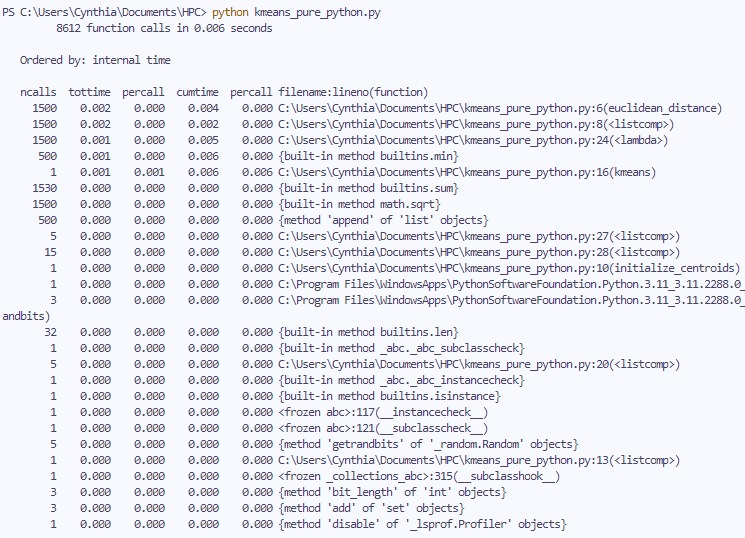

In [59]:
p1 = 'C:/Users/Cynthia/Documents/HPC/imagenes/runningpurepython.jpg'
Image(filename=p1)

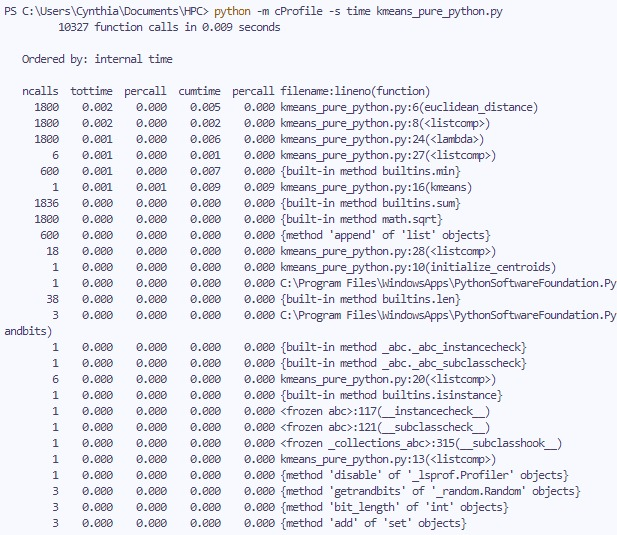

In [60]:
p2 = 'C:/Users/Cynthia/Documents/HPC/imagenes/profilepurepython.jpg'
Image(filename=p2)

### **cProfile commands evidence for Numpy Arrays**

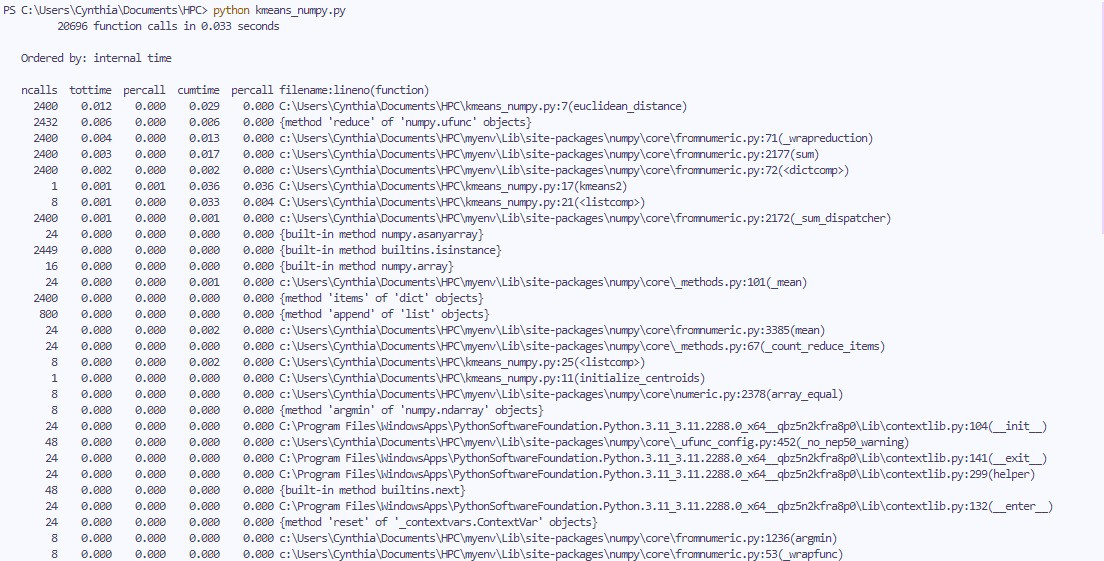

In [58]:
n2 = 'C:/Users/Cynthia/Documents/HPC/imagenes/runningNumpy.jpg'
Image(filename=n2)

### **cProfile use evidence(commands, for Cython)**

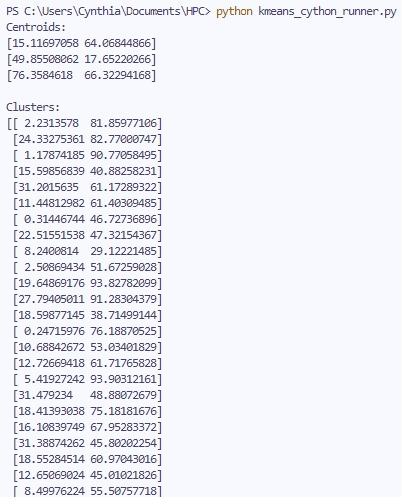

In [56]:
""""
I created a runnin.py that called the compiled module of cython, i name it kemans_cython.runner.py
"""
from IPython.display import Image
c1 = 'C:/Users/Cynthia/Documents/HPC/imagenes/runnincython.jpg'
Image(filename=c1)

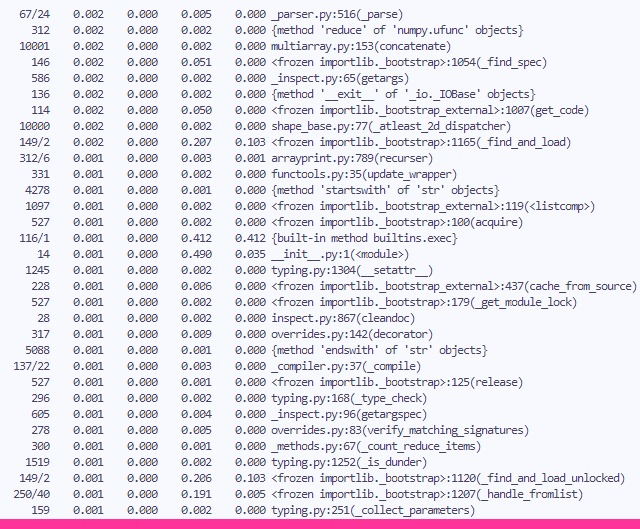

In [57]:
c2 = 'C:/Users/Cynthia/Documents/HPC/imagenes/resultscython.jpg'
Image(filename=c2)

In [11]:
import random
import math
import timeit
from memory_profiler import memory_usage
import numpy as np
import kmeans_cythonc

##  **Execution and Analysis**

**Pure python with a small and big data set with differents clusters**

In [34]:
import numpy as np
import random
import math
import timeit
from memory_profiler import memory_usage

if __name__ == "__main__":
    # Loading a dataset example, in this case the samllest 
    dataset_path = "datasets/dataset_2d_1000size.npy"
    data = np.load(dataset_path).tolist()  # Convert array to list for pure Python
    
    k = 3

    #Measure execution time
    exec_time = timeit.timeit(lambda: kmeans(data, k), number=1)
    print(f"Pure Python execution time for the smallest data set: {exec_time} sec")
    
    #Measure peak memory usage
    mem_usage = memory_usage((kmeans, (data, k)), max_usage=True, retval=True)
    print(f"Pure Python peak memory usage for the smallest data set: {mem_usage[0]} MiB")



Pure Python execution time for the smallest data set: 0.06831230001989752 sec
Pure Python peak memory usage for the smallest data set: 121.0390625 MiB


In [39]:
#adding more klusters and a bigger data set
if __name__ == "__main__":
    # Loading a dataset example, in this case the biggest 
    dataset_path = "datasets/dataset_5d_10000size.npy"
    data = np.load(dataset_path).tolist()  # Convert array to list for pure Python
    
    k = 5

    exec_time = timeit.timeit(lambda: kmeans(data, k), number=1)
    print(f"Pure Python execution time for the biggest data set: {exec_time} sec")

    mem_usage = memory_usage((kmeans, (data, k)), max_usage=True, retval=True)
    print(f"Pure Python peak memory usage for the biggest dta set: {mem_usage[0]} MiB")

Pure Python execution time for the biggest data set: 16.98840560001554 sec
Pure Python peak memory usage for the biggest dta set: 120.9921875 MiB


**Profiling Numpy Arrays Implementation for the biggest and samllest data set**

In [28]:
from memory_profiler import memory_usage


if __name__ == "__main__":
    dataset_path = "datasets/dataset_2d_1000size.npy"
    data = np.load(dataset_path)
    
    k = 3

    exec_time = timeit.timeit(lambda: kmeans2(data, k), number=1)
    print(f"Numpy Arrays execution time for the smallest data: {exec_time} sec")

    mem_usage = memory_usage((kmeans2, (data, k)), max_usage=True, retval=True)
    print(f"Numpy Arrays peak memory usage for the smallest data: {mem_usage[0]} MiB")

Numpy Arrays execution time for the smallest data: 0.5871275999816135 sec
Numpy Arrays peak memory usage for the smallest data: 92.40234375 MiB


In [38]:
#a bigger data set and more klosterssss
if __name__ == "__main__":
    dataset_path = "datasets/dataset_5d_10000size.npy"
    data = np.load(dataset_path)
    
    k = 5

    exec_time = timeit.timeit(lambda: kmeans2(data, k), number=1)
    print(f"Numpy Arrays execution time for the biggest data: {exec_time} sec")

    mem_usage = memory_usage((kmeans2, (data, k)), max_usage=True, retval=True)
    print(f"Numpy Arrays peak memory usage for the biggest data: {mem_usage[0]} MiB")

Numpy Arrays execution time for the biggest data: 37.067163300001994 sec
Numpy Arrays peak memory usage for the biggest data: 125.04296875 MiB


**Profiling Cython Implementation for the biggest and samllest data set**

In [24]:
import numpy as np
import timeit
from memory_profiler import memory_usage

from kmeans_cythonc import kmeans_cython

if __name__ == "__main__":
    dataset_path = "datasets/dataset_2d_1000size.npy"
    data = np.load(dataset_path)

    k = 3  # Number of clusters

    exec_time = timeit.timeit(lambda: kmeans_cython(data, k), number=1)
    print(f"Cython execution time for the smallest data set: {exec_time} sec")

    mem_usage = memory_usage((kmeans_cython, (data, k)), max_usage=True, retval=True)
    print(f"Cython peak memory usage for the smallest data set: {mem_usage[0]} MiB")


Cython execution time for the smallest data set: 1.3029345000395551 sec
Cython peak memory usage for the smallest data set: 134.04296875 MiB


In [37]:
from kmeans_cythonc import kmeans_cython

if __name__ == "__main__":
    dataset_path = "datasets/dataset_5d_10000size.npy"
    data = np.load(dataset_path)

    k = 5  # Number of clusters

    # Measure execution time
    exec_time = timeit.timeit(lambda: kmeans_cython(data, k), number=1)
    print(f"Cython execution time for the biggest data set: {exec_time} sec")
    mem_usage = memory_usage((kmeans_cython, (data, k)), max_usage=True, retval=True)
    print(f"Cython peak memory usage for the biggest data set: {mem_usage[0]} MiB")

Cython execution time for the biggest data set: 26.667743399972096 sec
Cython peak memory usage for the biggest data set: 124.796875 MiB


## **Visualization Of results**

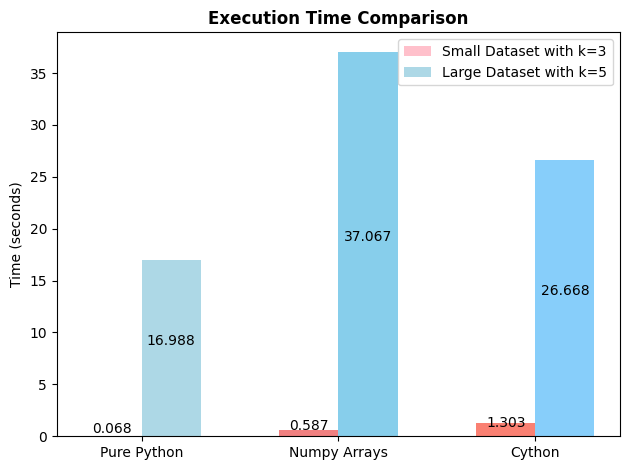

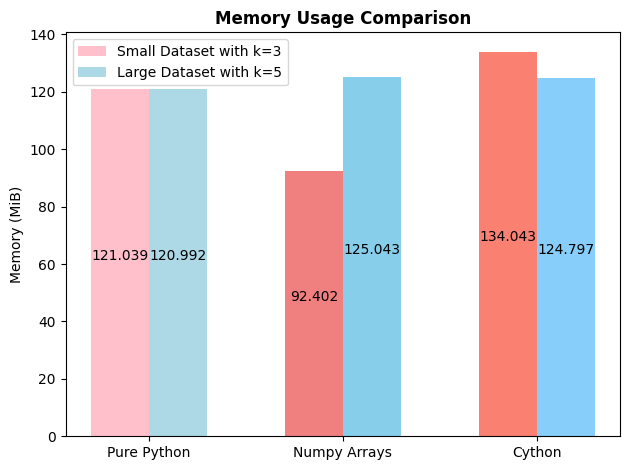

In [51]:
import matplotlib.pyplot as plt
import numpy as np

## Execution times already got it jejeje, im a cheater sorrys :(
exec_times_small = [0.0683123, 0.5871276, 1.3029345]#para datos pequeños
exec_times_large = [16.9884056, 37.0671633, 26.6677434]  #para datos grandes

mem_usage_small = [121.0390625, 92.40234375, 134.04296875]  #para datos pequeños
mem_usage_large = [120.9921875, 125.04296875, 124.796875]  #para datos grandes

labels = ['Pure Python', 'Numpy Arrays', 'Cython']

#datos en las barrasa la mitad, si no salen al tope y me da toc
def add_labels(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height / 2),
                    xytext=(0, 0),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Función para generar gráficos
def plot_comparison(labels, small_data, large_data, title, ylabel):
    x = np.arange(len(labels))  # the label locations
    width = 0.30

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, small_data, width, label='Small Dataset with k=3', color=['#FFC0CB', '#F08080', '#FA8072'])
    rects2 = ax.bar(x + width/2, large_data, width, label='Large Dataset with k=5', color=['#ADD8E6', '#87CEEB', '#87CEFA'])

    #etiquetas de datos
    add_labels(rects1, ax)
    add_labels(rects2, ax)

    ax.set_ylabel(ylabel)
    ax.set_title(title, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Comparación de tiempos de ejecución
plot_comparison(labels, exec_times_small, exec_times_large, 'Execution Time Comparison', 'Time (seconds)')

# Comparación de uso de memoria
plot_comparison(labels, mem_usage_small, mem_usage_large, 'Memory Usage Comparison', 'Memory (MiB)')


## **Conclusions**

*Each implementation taught us something important about performance optimization. We learned that while pure Python is invaluable for rapid development and prototyping, for applications that demand maximum performance, such as in HPC, it is imperative to turn to tools such as NumPy and Cython. These tools not only improve performance but also challenge us to think about how our code interacts with the underlying hardware, a crucial consideration for high performance computing. The experience of compiling and profiling with Cython, despite its challenges, showed us that low-level optimizations can have a dramatic impact on the performance of our applications, which helps us gain experience for our HPC subject matter.*

*I observed that from our implementations, Cython got the best results in terms of performance, showing the importance of compiler-level optimizations and the efficiency that can be achieved by moving closer to the hardware, an essential consideration in HPC. This underscores a key principle in high-performance computing: the need to balance development efficiency and code execution.*

*But, he have to say that the pure Python version, although intuitive and straightforward, turns out to be the least efficient in terms of speed and memory usage. This is mainly due to the interpreted nature of Python and its handling of high-level data types, which introduces significant overhead compared to compiled languages or approaches closer to hardware.*

*On the other hand, the implementation using NumPy shows considerable improvement in both aspects. NumPy, by operating closer to the hardware and leveraging optimized and compiled libraries, such as BLAS and LAPACK, for numerical operations, drastically reduces the computation time and memory required. This demonstrates how the use of specialized libraries can be crucial in HPC, where efficiency is key.*